# Regresión Lineal: Predicción de la presión sanguínea sistólica (medida en mm de Mercurio) según edad de la persona - Sin usar la librería Scikit Learn

En este ejercicio veremos paso a paso cómo implementar el algoritmo de Regresión Lineal en Python usando únicamente las librerías Pandas, Numpy y Matplotlib.
Ejemplo extraíodo del siguiente link:
https://www.codificandobits.com/blog/tutorial-regresion-lineal-en-python/

## Enunciado del ejercicio

Los datos a usar en este tutorial corresponden a la medición de la presión sanguínea sistólica (medida en mm de Mercurio) para 29 sujetos de diferentes edades. En este set de datos la variable independiente (x) corresponde a la edad de cada sujeto, mientras que la variable dependiente (y) es precisamente la presión sanguínea **(Presión sanguínea en función de la edad de las personas)**.

![Presi%C3%B3nSist%C3%B3lica.jpg](attachment:Presi%C3%B3nSist%C3%B3lica.jpg)

### 1. Librerías requeridas

Para la implementación de este algoritmo se requieren tres librerías que se pueden importar en Python usando las siguientes líneas de código:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Funciones auxiliares

Se implementarán tres funciones que en conjunto permiten realizar la regresión lineal de los datos.

#### 2.1 El modelo: calcular_modelo

Esta función permite calcular cada uno de los datos resultantes de la regresión, y corresponde a la ecuación y=wx+b donde w y b son los parámetros que queremos calcular con el algoritmo de Regresión Lineal.
Ésta es la implementación en Python:

In [ ]:
def calcular_modelo(w,b,x):
    '''Retorna el valor w*x+b correspondiente al modelo lineal'''
    return w*x+b

#### 2.2 El error cuadrático medio: calcular_error

Es la función de pérdida o función de error que será el error cuadrático medio (ECM). Donde N es el número total de datos (en este caso igual a 29, que es el número total de sujetos).
Por lo tanto, el código correspondiente en Python es el siguiente:

![mse.PNG](attachment:mse.PNG)

In [ ]:
def calcular_error(y,y_):
    '''Calcula el error cuadrático medio entre el dato original (y)
       y el dato generado por el modelo (y_)'''
    N = y.shape[0] # numero de columnas, datos. Para dividir por N
    error = np.sum((y-y_)**2)/N  # formula del MSE
    #error = (np.sqrt(np.sum(y-y_)**2))/N  # formula de la raiz cuadrada del MSE
    return error

#### 2.3 Algoritmo del Gradiente Descendente: gradiente_descendente

El algoritmo del Gradiente Descendente permite actualizar los valores w y b haciendo uso de las derivadas del ECM.
α representa la tasa de aprendizaje.
Así, para la implementación de la función usamos el siguiente código:

In [ ]:
def gradiente_descendente(w_, b_, alpha, x, y):
    '''Algoritmo del gradiente descendente para minimizar el error
       cuadrático medio'''
    N = x.shape[0]      # Cantidad de filas, de datos

    # Gradientes: derivadas de la función de error con respecto
    # a los parámetros "w" y "b"
    dw = -(2/N)*np.sum(x*(y-(w_*x+b_)))
    db = -(2/N)*np.sum(y-(w_*x+b_))

    # Actualizar los pesos usando la fórmula del gradiente descendente
    w = w_ - alpha*dw
    b = b_ - alpha*db

    return w, b

### 3 Lectura de los datos

El set de datos se almacenará en un DataFrame de Pandas, y posteriormente las variables edad y presión sanguínea se almacenan en dos arreglos Numpy (x y y respectivamente):

In [ ]:
datos = pd.read_csv('dataset.csv', sep=",", skiprows=32, usecols=[2,3])  # skiprows = 32 elimina las primeras 32 filas del
                                                                         # datasets que viene con una introduccion.
                                                                         # usecols selecciono las columnas 2 y 3.

In [ ]:
x = datos['Age'].values
y = datos['Systolic blood pressure'].values

In [ ]:
print (type(x)) # x en un array de Numpy
print (type(y)) # y en un array de Numpy

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
x

array([39, 45, 47, 65, 46, 67, 42, 67, 56, 64, 56, 59, 34, 42, 48, 45, 17,
       20, 19, 36, 50, 39, 21, 44, 53, 63, 29, 25, 69], dtype=int64)

In [ ]:
y

array([144, 138, 145, 162, 142, 170, 124, 158, 154, 162, 150, 140, 110,
       128, 130, 135, 114, 116, 124, 136, 142, 120, 120, 160, 158, 144,
       130, 125, 175], dtype=int64)

Leamos los primeros 10 registros del set de datos

In [ ]:
datos.head(10)

,Age,Systolic blood pressure
0,39,144
1,45,138
2,47,145
3,65,162
4,46,142
5,67,170
6,42,124
7,67,158
8,56,154
9,64,162


In [ ]:
type (datos) # verificamos que "datos" es un DataFrame de Pandas

pandas.core.frame.DataFrame

In [ ]:
datos.describe()
# este método incluye los percentiles 25, 50 y 75.

,Age,Systolic blood pressure
count,29.000000,29.000000
mean,45.068966,139.862069
std,15.560782,17.504538
min,17.000000,110.000000
25%,36.000000,125.000000
50%,45.000000,140.000000
75%,56.000000,154.000000
max,69.000000,175.000000


![percentiles.jpg](attachment:percentiles.jpg)

In [ ]:
datos.shape # verificamos que datos tiene 29 filas y 2 columnas

(29, 2)

Veamos en un gráfico el set de datos

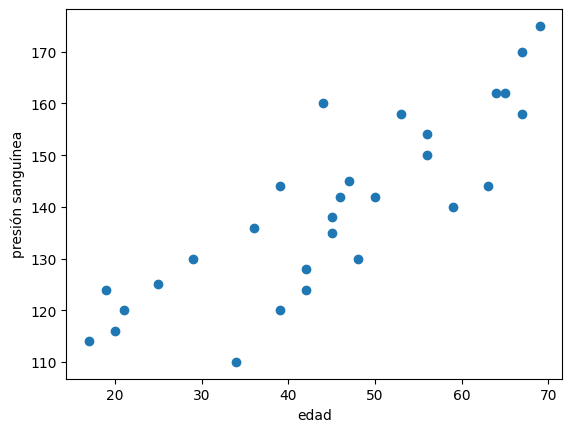

In [ ]:
plt.scatter(x,y)
plt.xlabel('edad')
plt.ylabel('presión sanguínea')
plt.show()

### 4. Entrenamiento usando el Gradiente Descendente

Ahora usamos las tres funciones definidas anteriormente para implementar la regresión lineal en Python, logrando así que el modelo “aprenda” los parámetros w y b.
Para ello inicializamos de forma aleatoria dichos parámetros:

In [ ]:
np.random.seed(2)
w = np.random.randn(1)[0] # inicializo w con un valor aleatorio
#w = np.random.randn(1)
b = np.random.randn(1)[0] # inicializo b con un valor aleatorio
w, b

(-0.4167578474054706, -0.056266827226329474)

donde "np.random.seed(2)" se usa para poder replicar los resultados incluso si el algoritmo se ejecuta en diferentes computadores.

Posteriormente definimos los parámetros α (tasa de aprendizaje) y el número de iteraciones.  Teniendo en cuenta que se tienen tan solo 29 datos, la tasa de aprendizaje es relativamente pequeña (0.0004) para garantizar la convergencia del algoritmo; lo anterior implica que se requerirá un número de iteraciones relativamente alto (40000 en este caso):

In [ ]:
alpha = 0.0004
#alpha = 0.04
#nits = 5000
nits = 40000

Para aprender los parámetros w y b se llevan a cabo los siguientes pasos dentro de cada iteración:
* Actualizar los parámetros usando la función gradiente_descendente
* Calcular la regresión lineal usando la función calcular_modelo
* Actualizar el valor del ECM usando la función "calcular_error"
* Imprimir los resultados en pantalla

Por tanto, el código completo para esta Regresión Lineal en Python es el siguiente:

In [ ]:
error = np.zeros((nits,1))
for i in range(nits):
    # Actualizar valor de los pesos usando el gradiente descendente
    [w, b] = gradiente_descendente(w,b,alpha,x,y)

    # Calcular el valor de la predicción
    y_ = calcular_modelo(w,b,x)

    # Actualizar el valor del error
    error[i] = calcular_error(y,y_)

    # Imprimir resultados cada 1000 epochs
    if (i+1)%1000 == 0:
        print("Epoch {}".format(i+1))
        print("    w: {:.1f}".format(w), " b: {:.1f}".format(b))
        print("    error: {}".format(error[i]))
        print("=======================================")

Epoch 1000
    w: 2.7  b: 7.7
    error: [909.68047113]
Epoch 2000
    w: 2.6  b: 14.8
    error: [784.20129437]
Epoch 3000
    w: 2.5  b: 21.3
    error: [677.81786006]
Epoch 4000
    w: 2.3  b: 27.3
    error: [587.62412923]
Epoch 5000
    w: 2.2  b: 32.8
    error: [511.15631133]
Epoch 6000
    w: 2.1  b: 37.9
    error: [446.32556178]
Epoch 7000
    w: 2.0  b: 42.6
    error: [391.36092172]
Epoch 8000
    w: 1.9  b: 46.9
    error: [344.76094135]
Epoch 9000
    w: 1.9  b: 50.9
    error: [305.25266532]
Epoch 10000
    w: 1.8  b: 54.6
    error: [271.75685992]
Epoch 11000
    w: 1.7  b: 57.9
    error: [243.35853196]
Epoch 12000
    w: 1.7  b: 61.0
    error: [219.28193427]
Epoch 13000
    w: 1.6  b: 63.9
    error: [198.86937488]
Epoch 14000
    w: 1.6  b: 66.5
    error: [181.56325105]
Epoch 15000
    w: 1.5  b: 68.9
    error: [166.89081746]
Epoch 16000
    w: 1.5  b: 71.2
    error: [154.4512724]
Epoch 17000
    w: 1.4  b: 73.2
    error: [143.90480915]
Epoch 18000
    w: 1.4  b

### 5 Resultados

En primer lugar, obtengamos la gráfica del ECM vs. las iteraciones:

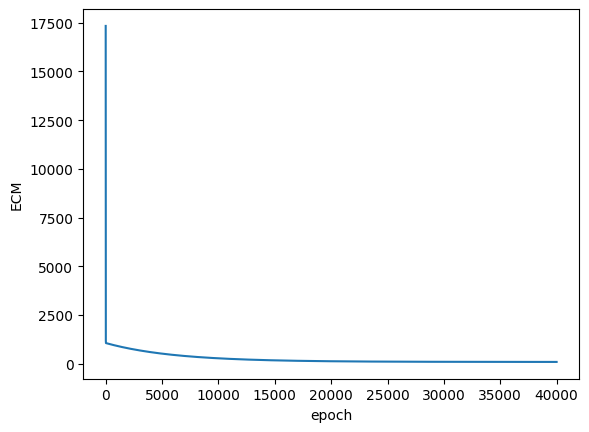

In [ ]:
plt.plot(range(nits),error)
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.show()

Al observar la figura de abajo podemos confirmar que la pérdida (ECM) disminuye a medida que el número de iteraciones se incrementa:

Ahora veamos el resultado de la Regresión Lineal y cómo después del entrenamiento obtenemos una línea recta que se ajusta bastante bien a los datos reales:

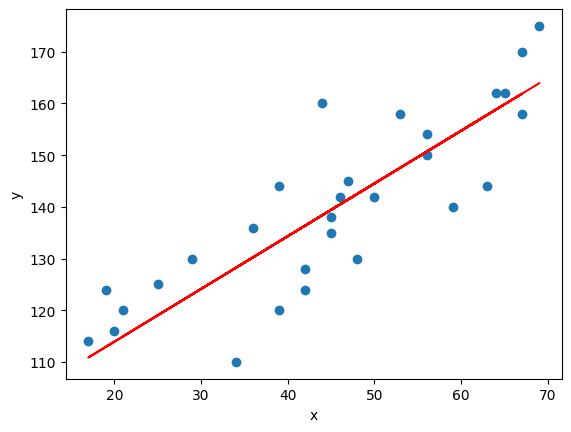

In [ ]:
y_regr = calcular_modelo(w,b,x)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

El resultado de la Regresión Lineal (línea de color rojo) permite evidenciar que ésta se ajusta bastante bien a los datos originales (puntos azules), lo cual permite verificar que el algoritmo de Regresión Lineal en Python funciona adecuadamente.

Por último, veamos cómo calcular una predicción a partir del modelo ya entrenado.

### 6 Predicción

Para finalizar, podemos realizar una predicción teniendo el modelo ya entrenado.

Si, por ejemplo, queremos conocer el nivel de presión sanguínea que tendrá una persona de 62 años, simplemente ejecutamos las siguientes líneas de código:

In [ ]:
edad = 62
presion = calcular_modelo(w,b,edad)
print("A los {}".format(edad), " años se tendrá una presión sanguínea de {:.1f}".format(presion))

A los 62  años se tendrá una presión sanguínea de 156.8


### Ejercicios
* Modificar nits (poner nits= 10000). Ver como se modifica la gráfica de ECM. ¿Es necesario colocar un valor en nits =40000, un valor tan grande?
* Viendo la gráfica de ECM con nits = 40000 ¿Qué podemos decir del modelo, es bueno o malo?
* Calcular el error con la raíz cuadrada del error cuadrático medio, volver a realizar el gráfico de ECM ¿es bueno o malo el modelo?. A los fines de este ejercicio no modificar el cálculo de la derivada para el gradiente descendiente.